# YOLOv3 Object Detection

> ## Image

# <font color = 'blue'>OpenCV Version Issue

* Colab - <font color = 'red'>2022.10.XX
 - opencv-contrib-python         4.6.0.66
 - opencv-python                 4.6.0.66
 - opencv-python-headless        4.6.0.66

> ## 1) OpenCV Version Check

In [1]:
!pip list | grep opencv

opencv-contrib-python         4.6.0.66
opencv-python                 4.6.0.66
opencv-python-headless        4.7.0.68


> ## 2) 4.6.0 Version Remove

In [2]:
!pip uninstall -y opencv-contrib-python

Found existing installation: opencv-contrib-python 4.6.0.66
Uninstalling opencv-contrib-python-4.6.0.66:
  Successfully uninstalled opencv-contrib-python-4.6.0.66


In [3]:
!pip uninstall -y opencv-python

Found existing installation: opencv-python 4.6.0.66
Uninstalling opencv-python-4.6.0.66:
  Successfully uninstalled opencv-python-4.6.0.66


In [4]:
!pip uninstall -y opencv-python-headless

Found existing installation: opencv-python-headless 4.7.0.68
Uninstalling opencv-python-headless-4.7.0.68:
  Successfully uninstalled opencv-python-headless-4.7.0.68


> ## 3) 4.1.2 Version Installation

In [5]:
!pip install opencv-python==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 47.7 MB/s eta 0:00:00


In [6]:
!pip install pip install opencv-contrib-python==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 25.9 MB/s eta 0:00:00


> ## 4) <font color = 'red'>4.1.2 버전 설치 후 '**런타임 다시 시작**'</font>

* 런타임 강제 종료 후 다시 시작

In [ ]:
import os

os.kill(os.getpid(), 9)

> ## 5) Import OpenCV Package

In [1]:
import cv2

cv2.__version__

'4.1.2'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'testImage.jpeg' 파일 다운로드

In [3]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/testImage.jpeg

--2023-01-31 07:26:45--  https://raw.githubusercontent.com/rusita-ai/pyData/master/testImage.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160514 (157K) [image/jpeg]
Saving to: ‘testImage.jpeg’

testImage.jpeg      100%[===================>] 156.75K  --.-KB/s    in 0.02s   

2023-01-31 07:26:45 (6.31 MB/s) - ‘testImage.jpeg’ saved [160514/160514]



* 확인

In [4]:
!ls -l testImage.jpeg

-rw-r--r-- 1 root root 160514 Jan 31 07:26 testImage.jpeg


# I. YOLOv3 Weight Download

## 1) 'yolov3.weights' 


In [5]:
from urllib.request import urlretrieve

urlretrieve('https://pjreddie.com/media/files/yolov3.weights','yolov3.weights')

('yolov3.weights', <http.client.HTTPMessage at 0x7f2d92477e80>)

## 2) 'yolov3-tiny.weights'

In [6]:
from urllib.request import urlretrieve

urlretrieve('https://pjreddie.com/media/files/yolov3-tiny.weights','yolov3-tiny.weights')

('yolov3-tiny.weights', <http.client.HTTPMessage at 0x7f2d850cf040>)

# II. darknet Clone

* yolov3.cfg
* yolov3-tiny.cfg
* coco.names

In [7]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 21.61 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


## 1) 'yolov3.cfg'

In [8]:
!cat darknet/cfg/yolov3.cfg

[net]
# Testing
# batch=1
# subdivisions=1
# Training
batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

[convolutiona

## 2) 'yolov3-tiny.cfg'

In [9]:
!cat darknet/cfg/yolov3-tiny.cfg

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filter

## 3) 'coco.names'

* 80가지 객체

In [10]:
!cat darknet/data/coco.names

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


# III. Image

## 1) Import Packages

In [11]:
from google.colab.patches import cv2_imshow
import numpy as np

## 2) 'Detection' 최소 신뢰도(확률) 지정

In [12]:
min_confidence = 0.5

## 3) Load YOLOv3

In [13]:
net = cv2.dnn.readNet('yolov3.weights', 'darknet/cfg/yolov3.cfg')
# net = cv2.dnn.readNet('yolov3-tiny.weights', 'darknet/cfg/yolov3-tiny.cfg')

# Detection된 Object(Class) List 배열 정의
classes = []   

# 80개의 Object(class)를 구분할 수 있는 Object의 이름을 classes 배열에 넣어준다.
with open('darknet/data/coco.names', 'r') as f:
   classes = [line.strip() for line in f.readlines()]   

layer_names = net.getLayerNames()

output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Object 마다 컬러를 하나씩 다르게 지정
colors = np.random.uniform(0, 255, size=(len(classes), 3))  

## 4) 원본 Image

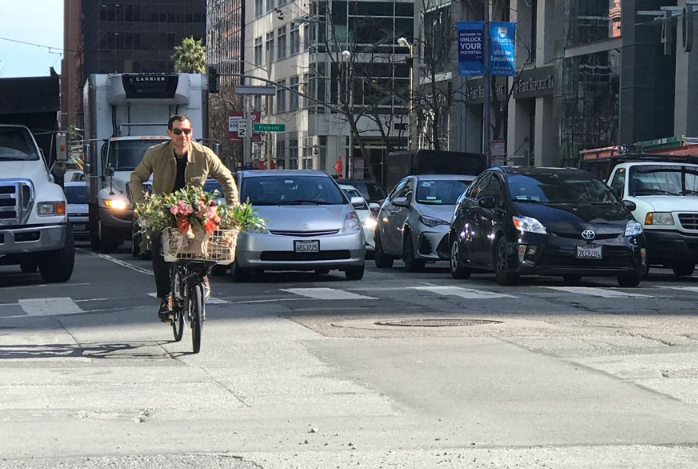

In [15]:
img = cv2.imread('/content/testImage.jpeg')
img = cv2.resize(img, None, fx = 0.8, fy = 0.8)

height, width, channels = img.shape

cv2_imshow(img)

## 5) Image Object Detection

* Object Detection

In [16]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop = False)

net.setInput(blob)

outs = net.forward(output_layers)  

* Showing Informations

In [17]:
class_ids = []     # Detection Class_ID 저장
confidences = []   # Detection Class_신뢰도(확률) 저장
boxes = []         # Detection Boxing_정보 저장

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)    # Detected Class_ID
        confidence = scores[class_id]   # Detected Class_신뢰도(확률)

        if confidence > min_confidence:  
            # Object Detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle Coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])             # Boxing_정보 추가
            confidences.append(float(confidence))  # 신뢰도(확률) 추가
            class_ids.append(class_id)             # Class_ID 추가

3 car
4 car
5 person
6 car
7 car
8 car
9 car
10 bicycle


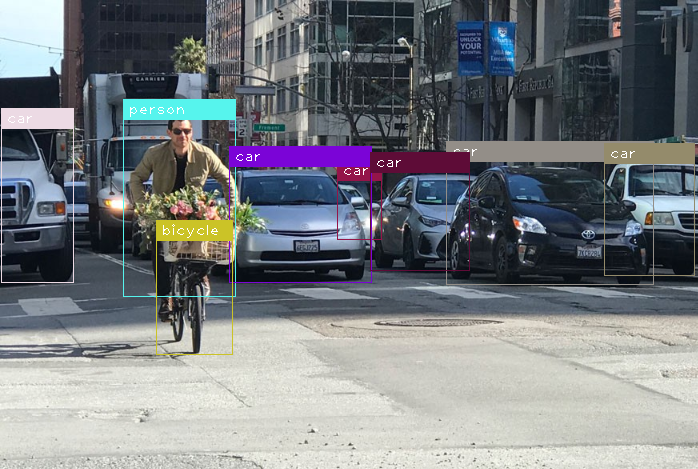

In [18]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)

font = cv2.FONT_HERSHEY_PLAIN

for i in range(len(boxes)):
    if i in indexes:    
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]]) 
        print(i, label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
        cv2.rectangle(img, (x, y - 20), (x + w, y), color, -1)
        cv2.putText(img, label, (x + 5, y - 5), font, 1, (255, 255, 255), 1)

cv2_imshow(img)

# 
# 
# 
# The End
# 
# 
# 